In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import numpy as np

import os

In [81]:
df = pd.read_csv("consulta_cand_2020_SP.csv", encoding='iso-8859-1', error_bad_lines=False)

In [82]:
#print(list(df.columns))

In [83]:
colunas = ['SG_UF_NASCIMENTO', 'SG_PARTIDO', 'NM_CANDIDATO', 'DS_GRAU_INSTRUCAO', 'DS_GENERO']

dados = pd.read_csv("consulta_cand_2020_SP.csv", encoding='iso-8859-1', sep=',', usecols=colunas)

In [84]:
df = dados

In [85]:
total_candidatos = df.groupby(['DS_GRAU_INSTRUCAO']).DS_GRAU_INSTRUCAO.count().sum()
total_candidatos

93330

In [86]:
df.groupby(['DS_GRAU_INSTRUCAO']).DS_GRAU_INSTRUCAO.count()

DS_GRAU_INSTRUCAO
ANALFABETO                           2
ENSINO FUNDAMENTAL COMPLETO      11065
ENSINO FUNDAMENTAL INCOMPLETO     8137
ENSINO MÉDIO COMPLETO            36807
ENSINO MÉDIO INCOMPLETO           4119
LÊ E ESCREVE                      2306
SUPERIOR COMPLETO                26304
SUPERIOR INCOMPLETO               4590
Name: DS_GRAU_INSTRUCAO, dtype: int64

In [87]:
total_estudados = (df.loc[df['DS_GRAU_INSTRUCAO'].isin(['SUPERIOR COMPLETO'])]).DS_GRAU_INSTRUCAO.count()
total_estudados

26304

In [88]:
superior_completo = (total_estudados * 100) / total_candidatos
superior_completo

28.183863709418194

In [89]:
sem_ensino_superior = 100 - superior_completo
sem_ensino_superior

71.81613629058181

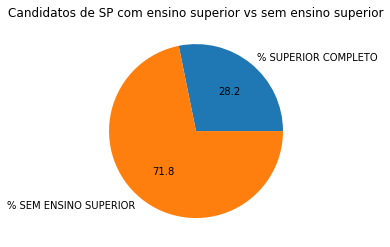

In [90]:
geral_ensino_superior = [superior_completo, sem_ensino_superior]
label_geral_ensino_superior = ['% SUPERIOR COMPLETO', '% SEM ENSINO SUPERIOR']
plt.axis('equal')
plt.pie(geral_ensino_superior, labels=label_geral_ensino_superior, autopct='%.1f')
plt.title('Candidatos de SP com ensino superior vs sem ensino superior')
plt.show()

In [91]:
sp_ensino_completo = (df.loc[(df["DS_GRAU_INSTRUCAO"]=="SUPERIOR COMPLETO") & (df["SG_UF_NASCIMENTO"]=="SP")]).SG_UF_NASCIMENTO.count()

In [92]:
nascidos_sp_ensino_superior_completo = (sp_ensino_completo * 100) / total_estudados
nascidos_sp_ensino_superior_completo

85.54972627737226

In [93]:
nao_nascidos_sp_ensino_superior_completo = 100 - nascidos_sp_ensino_superior_completo
nao_nascidos_sp_ensino_superior_completo

14.450273722627742

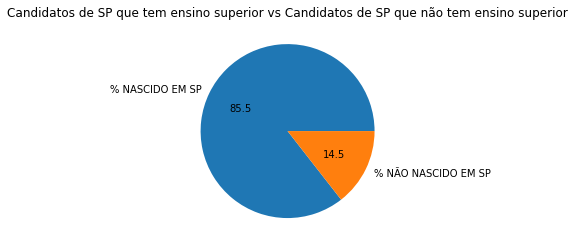

In [94]:
geral_ensino_superior = [nascidos_sp_ensino_superior_completo, nao_nascidos_sp_ensino_superior_completo]
label_geral_ensino_superior = ['% NASCIDO EM SP', '% NÃO NASCIDO EM SP']
plt.axis('equal')
plt.pie(geral_ensino_superior, labels=label_geral_ensino_superior, autopct='%.1f')
plt.title('Candidatos de SP que tem ensino superior vs Candidatos de SP que não tem ensino superior')
plt.show()

In [160]:
fem_ensino_completo = (df.loc[(df["DS_GRAU_INSTRUCAO"]=="SUPERIOR COMPLETO") & (df["DS_GENERO"]=="FEMININO")]).DS_GENERO.count()

In [96]:
fem_total = (df.loc[(df["DS_GENERO"]=="FEMININO")]).DS_GENERO.count()

In [97]:
porcento_fem_ensino_completo = (fem_ensino_completo * 100) / fem_total

In [162]:
print(fem_ensino_completo)
print(fem_total)

9753
31223


In [98]:
mas_ensino_completo = (df.loc[(df["DS_GRAU_INSTRUCAO"]=="SUPERIOR COMPLETO") & (df["DS_GENERO"]=="MASCULINO")]).DS_GENERO.count()

In [99]:
mas_total = (df.loc[(df["DS_GENERO"]=="MASCULINO")]).DS_GENERO.count()

In [100]:
porcento_mas_ensino_completo = (mas_ensino_completo * 100) / mas_total

In [101]:
gruped = df[(df["DS_GRAU_INSTRUCAO"]=="SUPERIOR COMPLETO")].groupby("SG_PARTIDO").count()

In [111]:
print(gruped["DS_GRAU_INSTRUCAO"])

SG_PARTIDO
AVANTE            579
CIDADANIA         893
DC                174
DEM              1890
MDB              1835
NOVO              113
PATRIOTA          781
PC do B           276
PCB                 4
PCO                32
PDT               923
PL               1425
PMB               115
PMN               140
PODE             1414
PP               1046
PROS              257
PRTB              579
PSB              1006
PSC               499
PSD              1806
PSDB             2756
PSL              1156
PSOL              489
PSTU               24
PT               1128
PTB              1519
PTC               224
PV                907
REDE              300
REPUBLICANOS     1335
SOLIDARIEDADE     673
UP                  6
Name: DS_GRAU_INSTRUCAO, dtype: int64


Text(0.5, 1.0, 'Canditos formados superior por partidos')

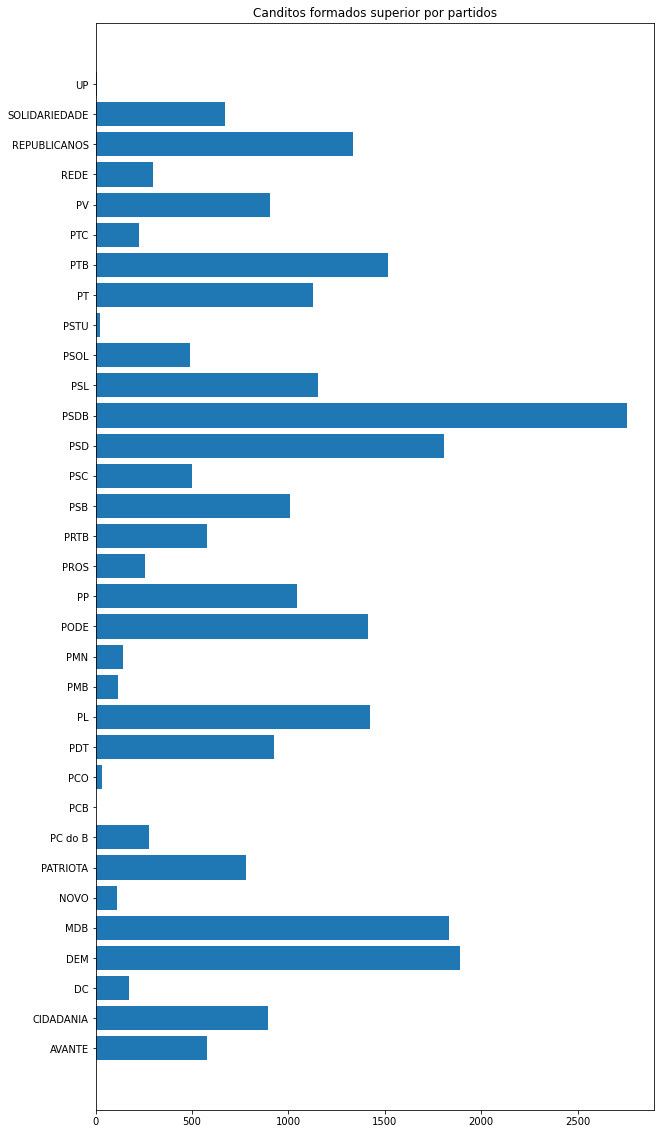

In [142]:
plt.figure(figsize=(10,20))
plt.barh(gruped.index,gruped["DS_GRAU_INSTRUCAO"], .8)
plt.yticks(gruped.index)
plt.title('Canditos formados superior por partidos')

Text(0.5, 1.0, 'Quantidade de homens vs mulheres candidatos')

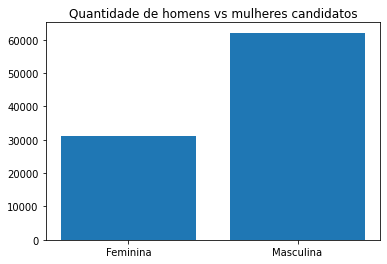

In [158]:
barras = {'Feminina':fem_total, 'Masculina':mas_total}
plt.bar(barras.keys(), barras.values())
plt.title('Quantidade de homens vs mulheres candidatos')

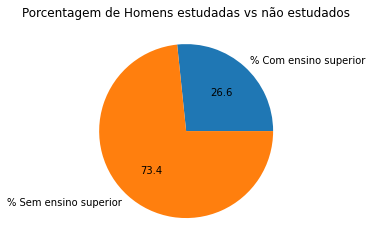

In [166]:
sem_ensino = 100 - porcento_mas_ensino_completo
geral_ensino_superior = [porcento_mas_ensino_completo, sem_ensino]
label_geral_ensino_superior = ['% Com ensino superior', '% Sem ensino superior']
plt.axis('equal')
plt.pie(geral_ensino_superior, labels=label_geral_ensino_superior, autopct='%.1f')
plt.title('Porcentagem de Homens estudadas vs não estudados')
plt.show()

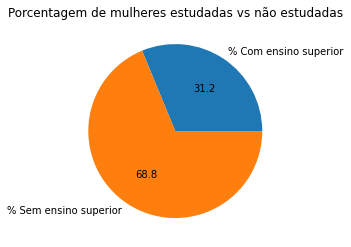

In [165]:
sem_ensino = 100 - porcento_fem_ensino_completo
geral_ensino_superior = [porcento_fem_ensino_completo, sem_ensino]
label_geral_ensino_superior = ['% Com ensino superior', '% Sem ensino superior']
plt.axis('equal')
plt.pie(geral_ensino_superior, labels=label_geral_ensino_superior, autopct='%.1f')
plt.title('Porcentagem de mulheres estudadas vs não estudadas')
plt.show()

Text(0.5, 1.0, 'Porcentagem de pessoas com ensino superior, Feminina vs Masculina')

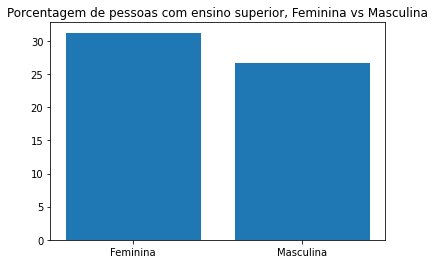

In [171]:
barrash = {'Feminina':porcento_fem_ensino_completo, 'Masculina':porcento_mas_ensino_completo}
plt.bar(barrash.keys(), barrash.values())
plt.title('Porcentagem de pessoas com ensino superior, Feminina vs Masculina')